# Analysing causes of cancer

### SEN163B - Responsible Data Analytics

Welcome to our code. We are:
- Allegra Melli 6104916, 
- Ann-Kathrin Peitz 6069819, 
- Julian Jahangir 5176379, 
- Jurriaan van Lanschot 4929357, 
- Tim Hol 4487346. 

We hope it contains everything required. If there are any questions please feel free to contact us. Kind regards, group 1.

# 0 - Setting up and importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

cancer_df = pd.read_excel('Project_Data/cancer patient data sets.xlsx')

# 1 - Exploring the Cancer data

In [2]:
# The imported dataset in a dataframe
cancer_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,3
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,3
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


In [4]:
# Exploring all columns
cancer_df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

### 1.1 Data Cleaning and Prepocessing

# 2 - Descriptive Analytics

### 2.1 Age and gender distributions

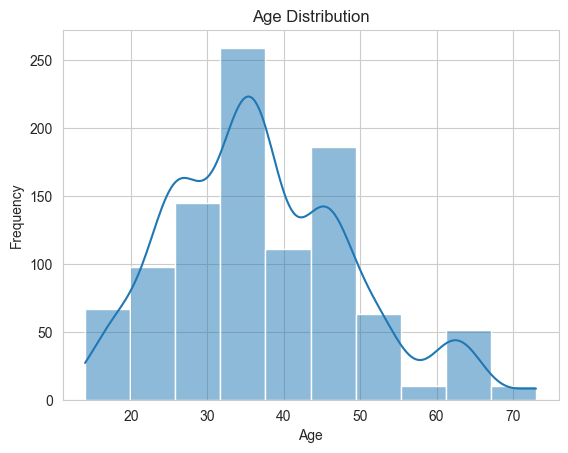

In [5]:
# Observing the age distribution within the dataset
sns.histplot(cancer_df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

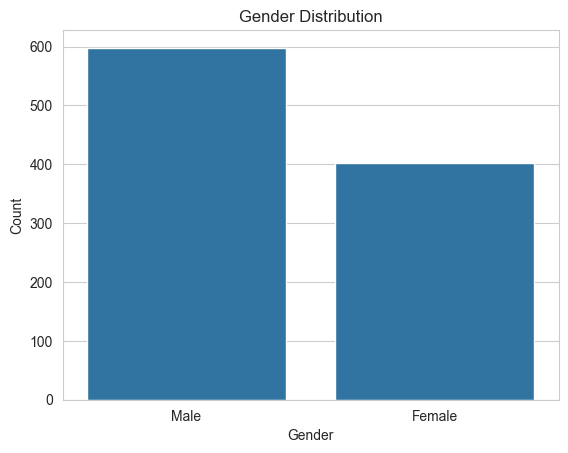

In [6]:
# The Gender distribution of the dataset
sns.countplot(x='Gender', data=cancer_df)
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### 2.2 Age and Air pollution

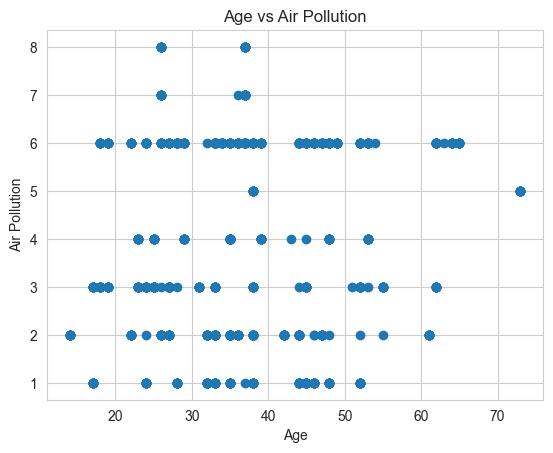

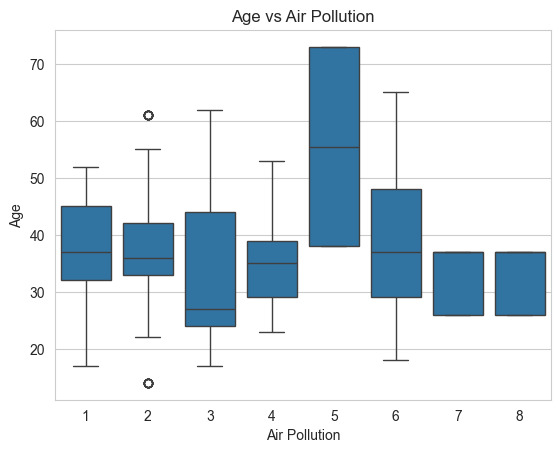

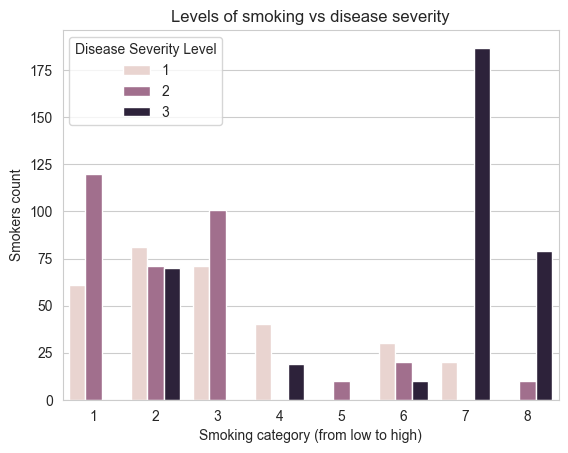

In [15]:
# The Age vs the Air pollution
plt.scatter(cancer_df['Age'], cancer_df['Air Pollution'])
plt.title('Age vs Air Pollution')
plt.xlabel('Age')
plt.ylabel('Air Pollution')
plt.show()

In [ ]:
# Age vs Air pollution box plot
sns.boxplot(x = cancer_df['Air Pollution'], y = cancer_df['Age'])
plt.title('Age vs Air Pollution')
plt.ylabel('Age')
plt.xlabel('Air Pollution')
plt.show()

### 2.3 Smoking distributions

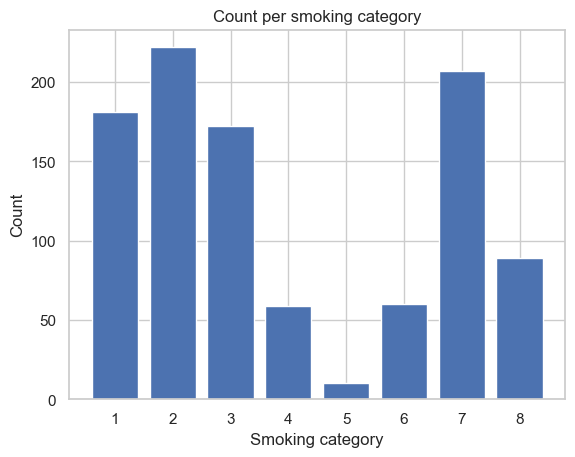

In [11]:
# Count occurrences of each unique value in the 'Smoking' column
smoking_counts = cancer_df['Smoking'].value_counts()

# Plotting
plt.bar(smoking_counts.index, smoking_counts.values)  # Adjust colors if needed
plt.xlabel('Smoking category')
plt.ylabel('Count')
plt.title('Count per smoking category')
plt.show()

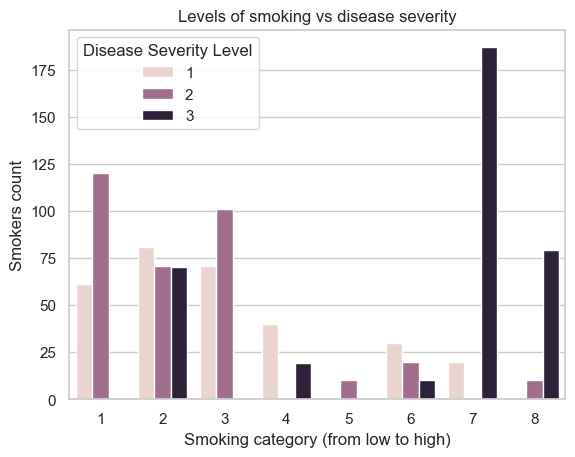

In [12]:
# Smoking level vs Disease Severity
sns.countplot(x = cancer_df['Smoking'], hue = cancer_df['Level'], )
plt.title('Levels of smoking vs disease severity')
plt.legend(title='Disease Severity Level')
plt.xlabel('Smoking category (from low to high)')
plt.ylabel('Smokers count')
plt.show()

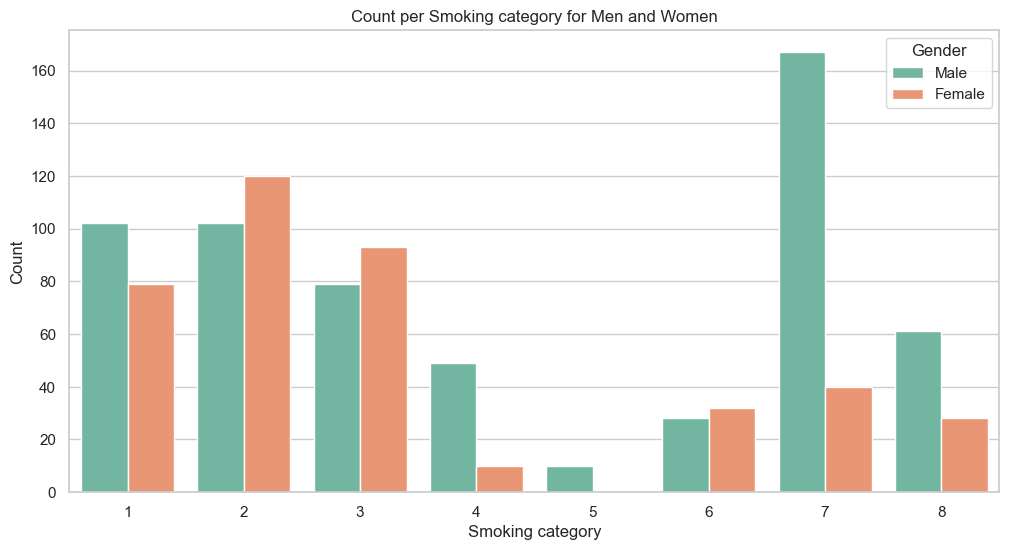

In [15]:
# Smoking category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Assuming 'Gender' is the column name for gender
sns.countplot(x='Smoking', hue='Gender', data=cancer_df, palette='Set2')

plt.xlabel('Smoking category')
plt.ylabel('Count')
plt.title('Count per Smoking category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

### 2.4 - Disease Severity and gender

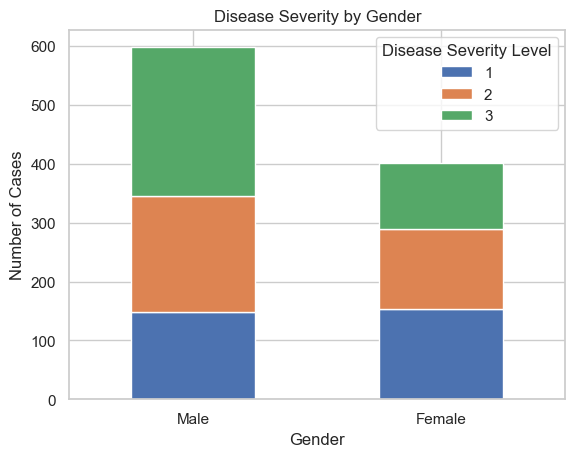

In [16]:
# Amount of cases and their severity vs the gender division
pd.crosstab(cancer_df['Gender'], cancer_df['Level']).plot(kind='bar', stacked=True)
plt.title('Disease Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.legend(title='Disease Severity Level')
plt.show()

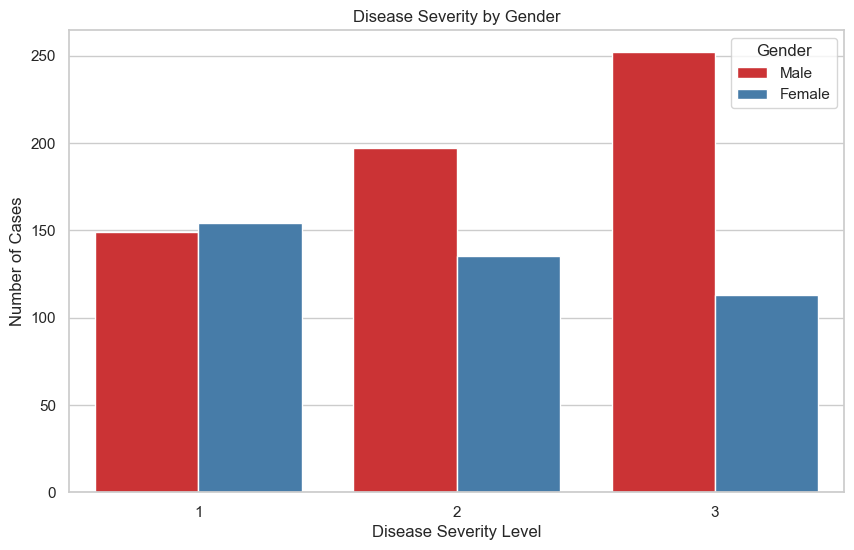

In [9]:
# Level of disease severity by gender, split per level
# Assuming CancerData is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Assuming 'Gender' is the column name for gender
sns.countplot(x='Level', hue='Gender', data=cancer_df, palette='Set1')

plt.title('Disease Severity by Gender')
plt.xlabel('Disease Severity Level')
plt.ylabel('Number of Cases')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()